In [4]:
import pandas as pd

# Assuming you've already loaded these DataFrames or you can load them from CSVs directly
df_gidnet_and_qnet = pd.read_csv('data_cutqc_supremacy_cct/GidNET_and_QNET_width_and_runtime_cutqc_supremacy_cct_data.csv')
df_qiskit = pd.read_csv('data_cutqc_supremacy_cct/Qiskit_width_and_runtime_supremacy_cct_cycle_10_data.csv')

# Merging the DataFrames on 'Circuit Sizes'
df_combined = pd.merge(df_gidnet_and_qnet, df_qiskit, on='Circuit Sizes', how='outer', suffixes=('', '_qiskit'))

# Account for the randomness in QNET by dividing by the number of shots in QNET
shots = 10
df_combined['QNET Average Runtime'] = df_combined['QNET Average Runtime']/shots
df_combined['QNET Stdev Runtime'] = df_combined['QNET Stdev Runtime']/shots

# Save the combined DataFrame to CSV
df_combined.to_csv('data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv', index=False)


In [5]:
df_combined

,Circuit Sizes,GidNET Average Runtime,GidNET Stdev Runtime,GidNET Width,QNET Average Runtime,QNET Stdev Runtime,QNET Width,Qiskit Average Runtime,Qiskit Stdev Runtime,Qiskit Width
0,16,0.029454,0.000625,8,0.023204,0.002065,8,0.034403,0.000699,11
1,20,0.053365,0.002297,10,0.064420,0.003251,9,0.047088,0.001515,14
2,25,0.112911,0.004600,10,0.191357,0.003405,9,0.063693,0.002517,16
3,30,0.251762,0.017385,11,0.444257,0.011629,12,0.078211,0.001687,21
4,36,0.417174,0.022870,12,1.034422,0.034399,11,0.102692,0.006834,22
5,42,0.802319,0.062082,12,2.400516,0.105699,13,0.123056,0.004165,27
6,49,1.515375,0.095992,13,4.306071,0.104746,14,0.155348,0.008213,33
7,56,2.080951,0.085962,14,7.457042,0.327212,19,0.182108,0.003301,40
8,64,3.708214,0.360354,19,14.602007,0.198553,19,0.218533,0.007662,45
9,72,5.592460,0.331839,18,27.030578,0.420290,20,0.266496,0.015780,51


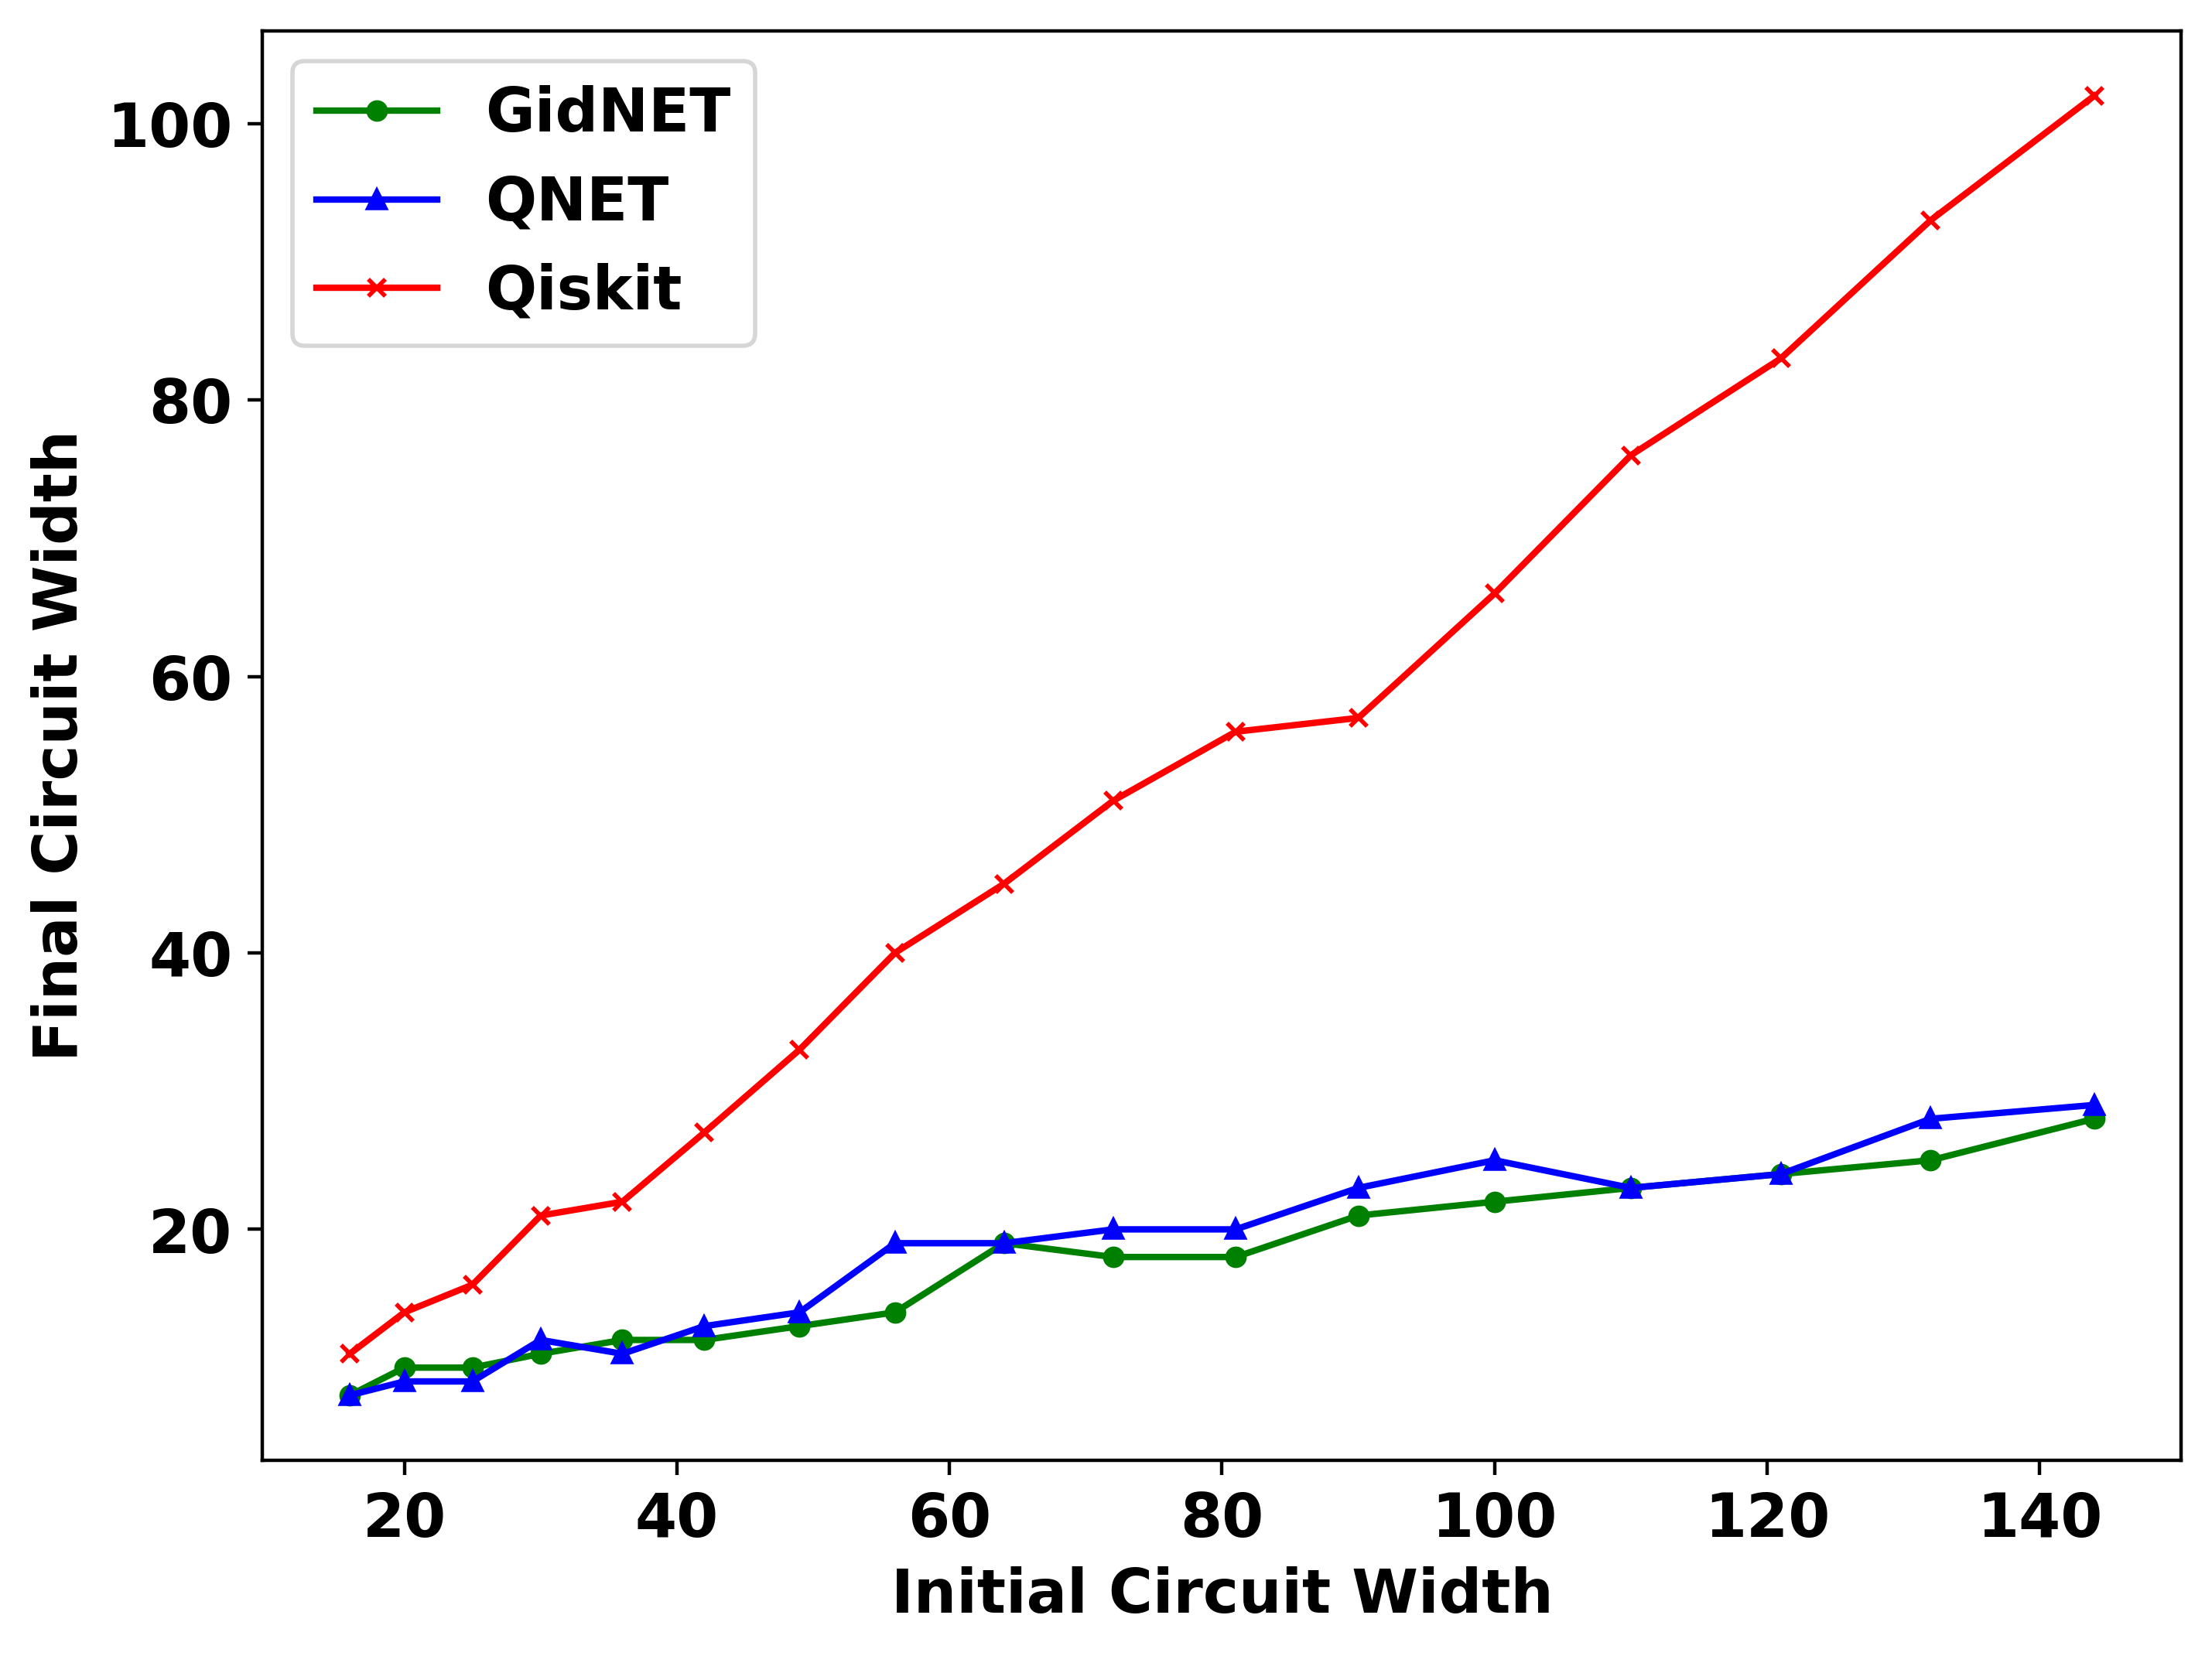

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv'
df = pd.read_csv(data_path)

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for deterministic method
plt.plot(df["Circuit Sizes"], df["GidNET Width"], label='GidNET', marker='o', color="green", linestyle='-', markersize=4)

# Plot for QNET
plt.plot(df["Circuit Sizes"], df["QNET Width"], label='QNET', marker='^', color="blue", linestyle='-', markersize=4)

# Plot for random method (Qiskit)
plt.plot(df["Circuit Sizes"], df["Qiskit Width"], label='Qiskit', marker='x', color="red", linestyle='-', markersize=4)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Qubit Reuse \n Algorithms for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Final Circuit Width', fontsize=14, fontweight='bold')
plt.legend(prop={'size': 14, 'weight': 'bold'})

plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)

# Optionally uncomment to enable grid
# plt.grid(True)

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_cutqc_supremacy_cct/GidNET_QNET_and_Qiskit_supremacy_initial_vs_final_circuit_width_lineplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


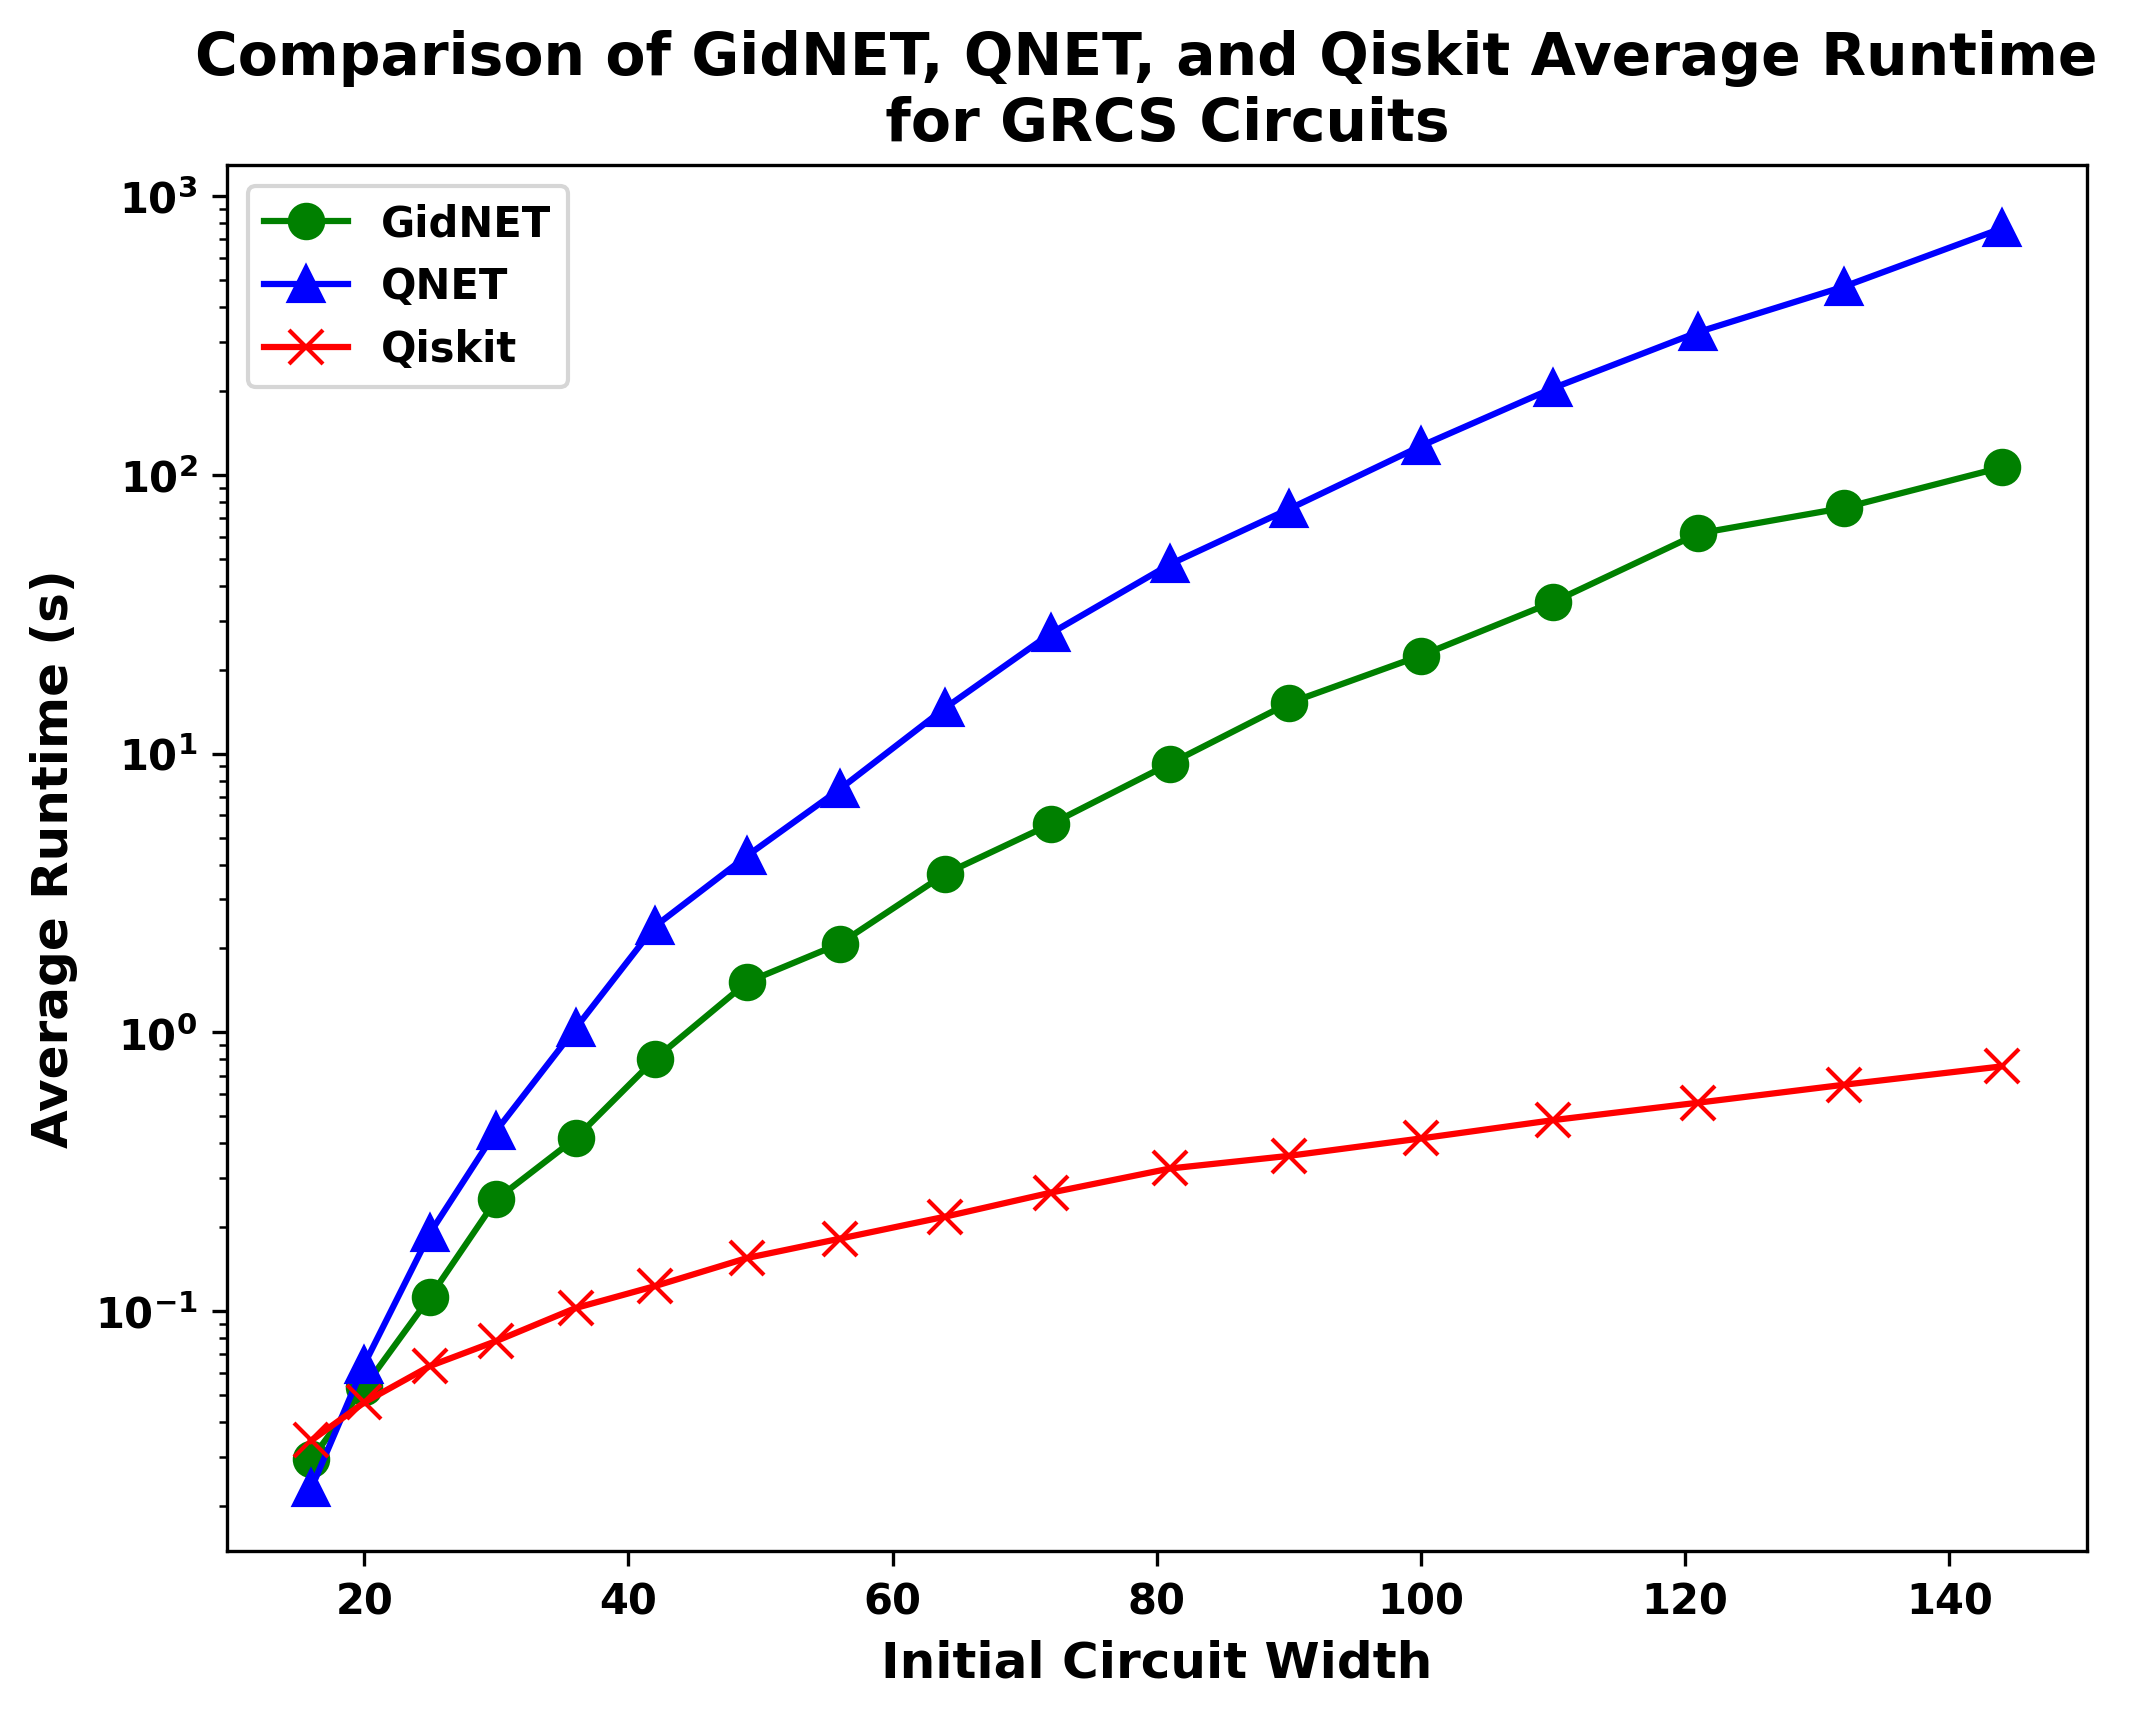

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv'
df = pd.read_csv(data_path)

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=300)  # Adjusted size to suit typical LaTeX document width

# Plot for deterministic method (GidNET)
plt.plot(df["Circuit Sizes"], df["GidNET Average Runtime"], label='GidNET', marker='o', color="green", linestyle='-', markersize=8)

# Plot for QNET
plt.plot(df["Circuit Sizes"], df["QNET Average Runtime"], label='QNET', marker='^', color="blue", linestyle='-', markersize=8)

# Plot for random method (Qiskit)
plt.plot(df["Circuit Sizes"], df["Qiskit Average Runtime"], label='Qiskit', marker='x', color="red", linestyle='-', markersize=8)

# Adding titles and labels with increased font size for better readability
plt.title('Comparison of GidNET, QNET, and Qiskit Average Runtime \n for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=12, fontweight='bold')
plt.ylabel('Average Runtime (s)', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 10, 'weight': 'bold'})

plt.xticks(fontweight='bold', fontsize=10)
plt.yticks(fontweight='bold', fontsize=10)

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Optionally uncomment to enable grid
# plt.grid(True)

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_cutqc_supremacy_cct/GidNET_QNET_and_Qiskit_supremacy_initial_circuit_width_vs_average_runtime_per_shot_logplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


/tmp/ipykernel_103137/2050275415.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
/tmp/ipykernel_103137/2050275415.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-^" (-> marker='^'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
/tmp/ipykernel_103137/2050275415.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-x" (-> marker='x'). The keyword argument will take precedence.
  plt.errorbar(df["Circuit Sizes"], df["Qiskit Average 

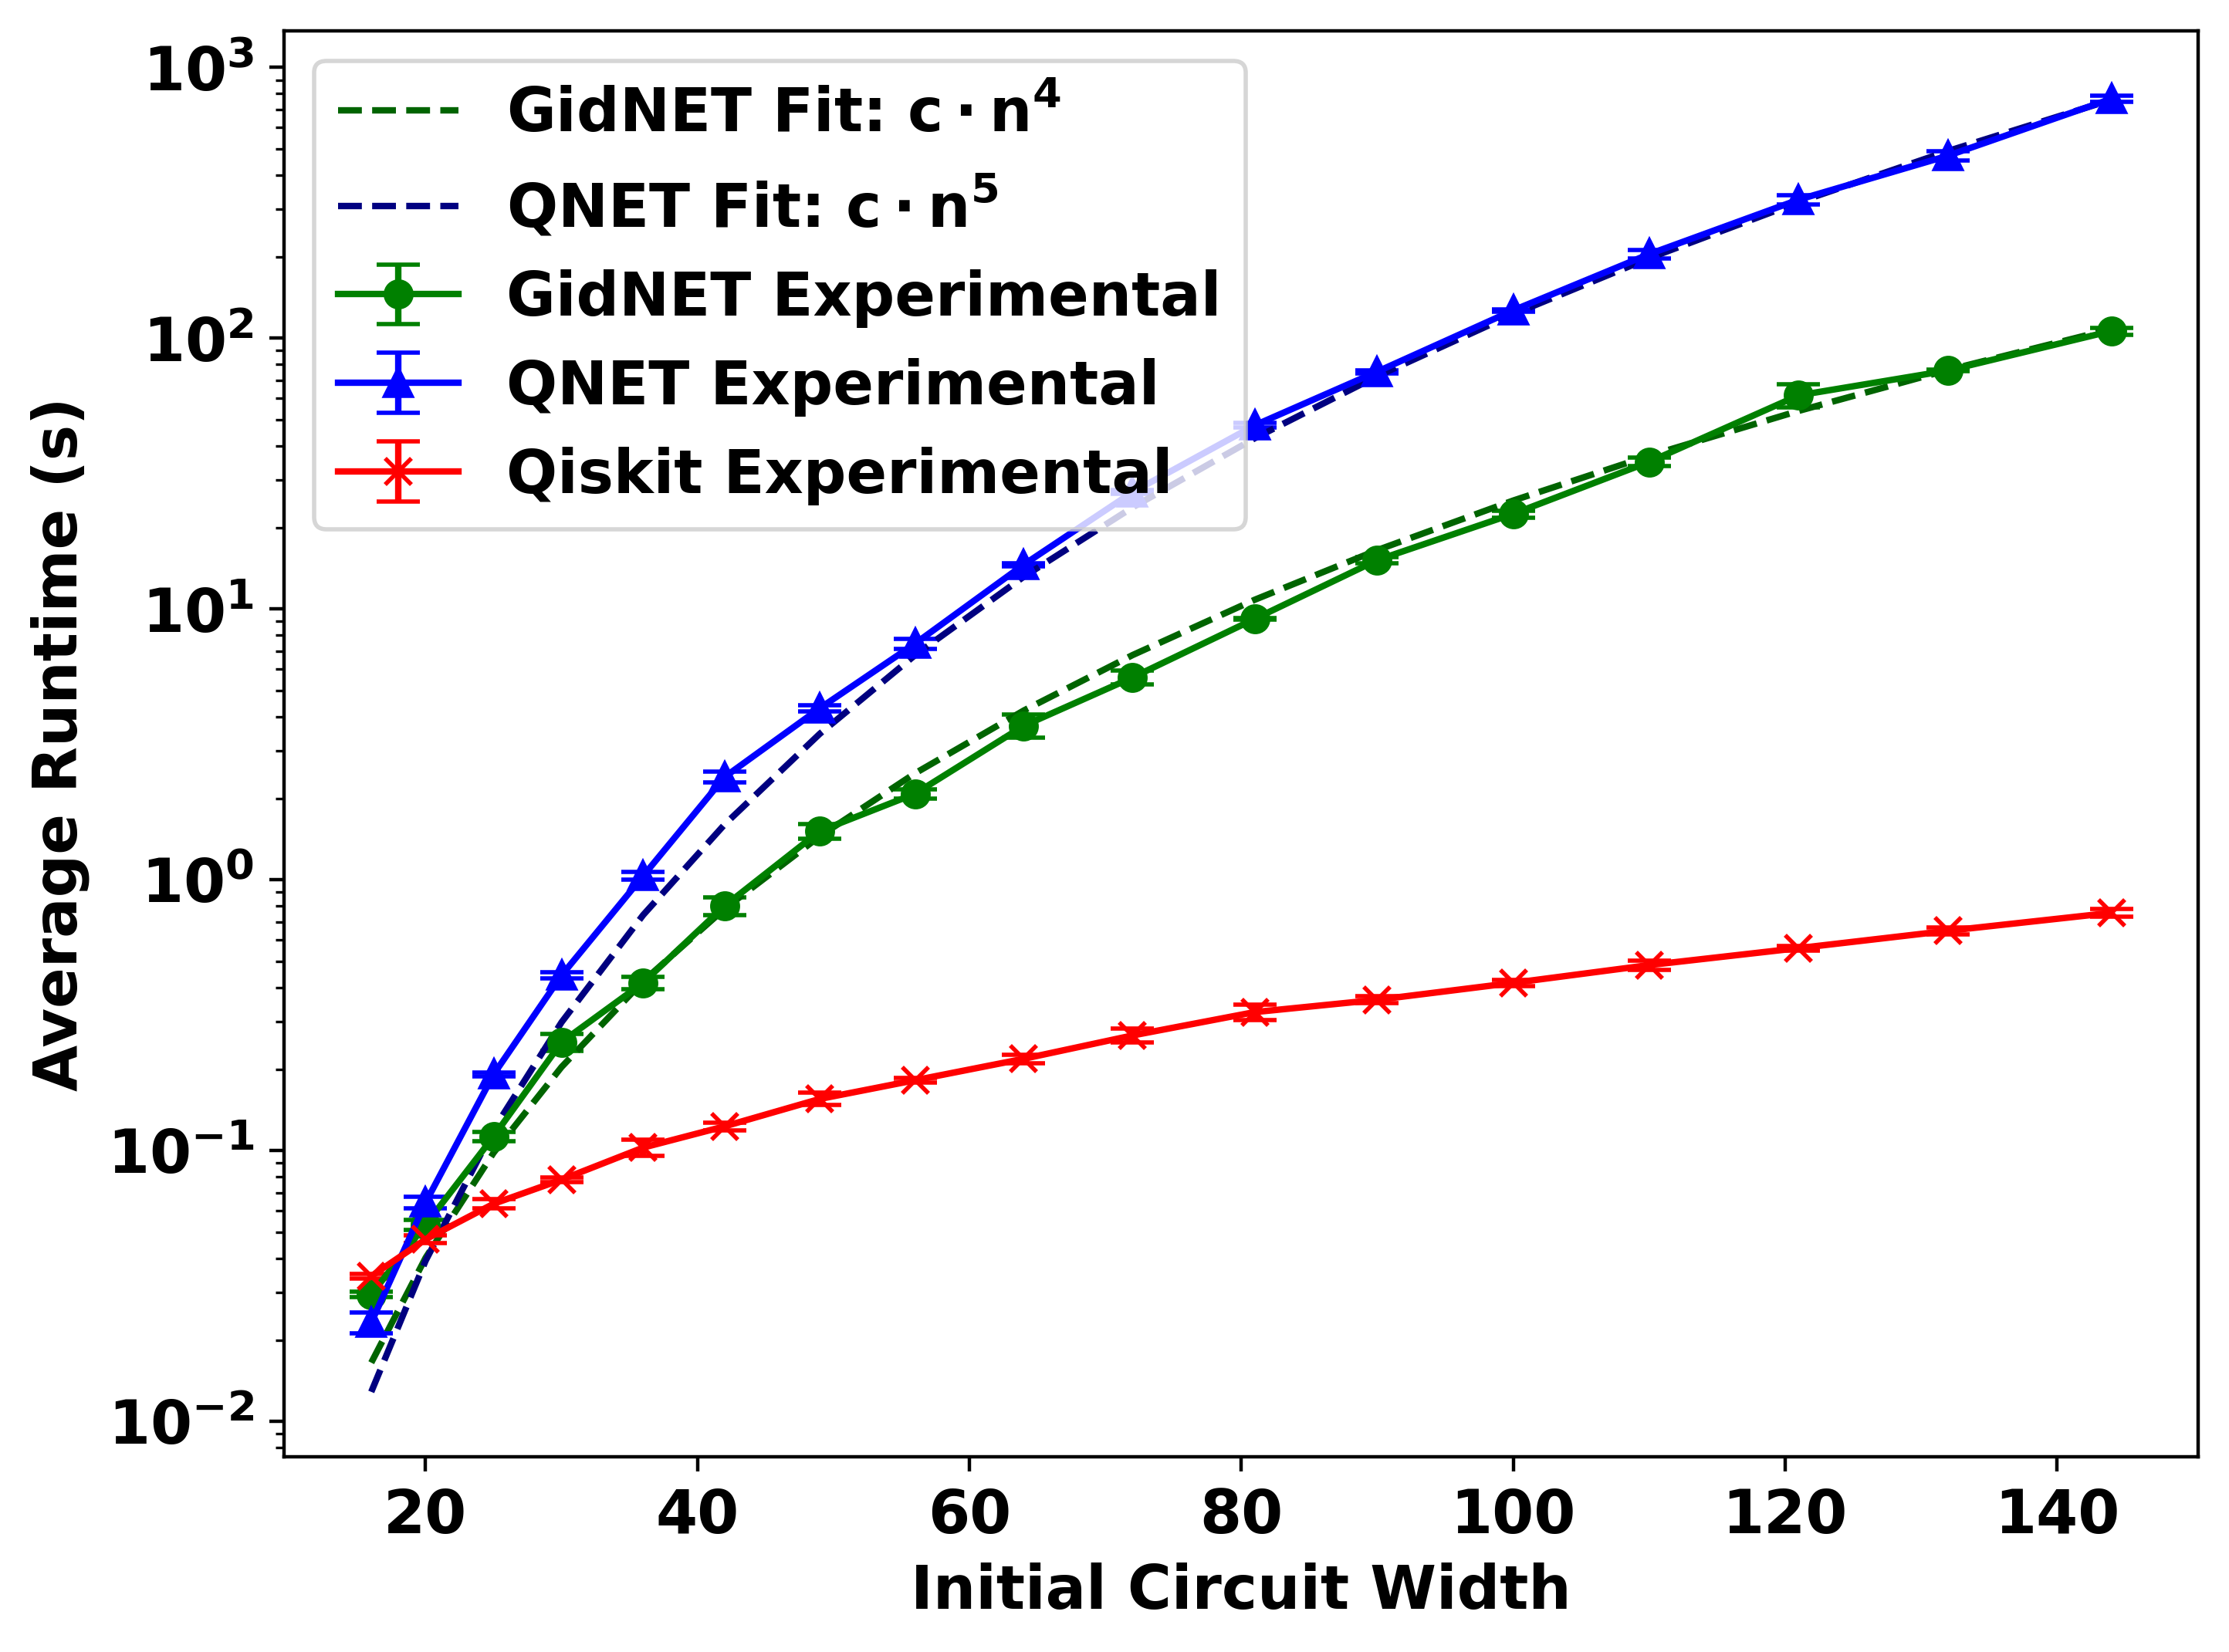

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv'
df = pd.read_csv(data_path)

# Define model functions
def model_gidnet(n, c):
    return c * n**4

def model_qnet(n, c):
    return c * n**5

# Curve fitting for GidNET and QNET
popt_gidnet, _ = curve_fit(model_gidnet, df["Circuit Sizes"], df["GidNET Average Runtime"])
popt_qnet, _ = curve_fit(model_qnet, df["Circuit Sizes"], df["QNET Average Runtime"])

# Adjust the figure size and set DPI for higher quality output
plt.figure(figsize=(8, 6), dpi=400)  # Adjusted size to suit typical LaTeX document width

# Plot for GidNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["GidNET Average Runtime"], yerr=df["GidNET Stdev Runtime"], label='GidNET Experimental', marker='o', color="green", fmt='-o', capsize=5)
plt.plot(df["Circuit Sizes"], model_gidnet(df["Circuit Sizes"], *popt_gidnet), color="darkgreen", linestyle='--', label=r'GidNET Fit: $\mathbf{c \cdot n^4}$')

# Plot for QNET with error bars and fit
plt.errorbar(df["Circuit Sizes"], df["QNET Average Runtime"], yerr=df["QNET Stdev Runtime"], label='QNET Experimental', marker='^', color="blue", fmt='-^', capsize=5)
plt.plot(df["Circuit Sizes"], model_qnet(df["Circuit Sizes"], *popt_qnet), color="navy", linestyle='--', label=r'QNET Fit: $\mathbf{c \cdot n^5}$')

# Plot for Qiskit with error bars only (no fit)
plt.errorbar(df["Circuit Sizes"], df["Qiskit Average Runtime"], yerr=df["Qiskit Stdev Runtime"], label='Qiskit Experimental', marker='x', color="red", fmt='-x', capsize=5)

# Adding titles and labels with increased font size for better readability
# plt.title('Comparison of GidNET, QNET, and Qiskit Average Runtime \n for GRCS Circuits', fontsize=14, fontweight='bold')
plt.xlabel('Initial Circuit Width', fontsize=14, fontweight='bold')
plt.ylabel('Average Runtime (s)', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.legend(prop={'size': 14, 'weight': 'bold'})

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Save the figure as a PDF file for high-quality vector graphics
fig_path = 'plots_cutqc_supremacy_cct/GidNET_QNET_and_Qiskit_supremacy_initial_circuit_width_vs_average_runtime_per_shot_fit_logplot.pdf'
plt.savefig(fig_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


### F-test and R-squared values

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_gidnet(df["Circuit Sizes"], *popt_gidnet))
experimental_values = np.array(df["GidNET Average Runtime"])

# Fit the polynomial regression
degree=5
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)


R-squared value: 0.9965626959556098
F-statistic: 483.209458675432


In [14]:
# Define your circuit sizes and corresponding theoretical and experimental values
circuit_size = np.array(df["Circuit Sizes"])
theoretical_values = np.array(model_qnet(df["Circuit Sizes"], *popt_qnet))
experimental_values = np.array(df["QNET Average Runtime"])


# Fit the polynomial regression
degree=5
poly_features = PolynomialFeatures(degree)
X_poly = poly_features.fit_transform(circuit_size.reshape(-1, 1))
model = LinearRegression().fit(X_poly, experimental_values)
predicted_values = model.predict(X_poly)

# Calculate R-squared value
r_squared = r2_score(experimental_values, predicted_values)

# Compute the F-statistic
n = len(circuit_size)
k = degree + 1  # Degree of polynomial + 1 (for the intercept)
f_statistic = (r_squared / (1 - r_squared)) * ((n - k - 1) / k)

print("R-squared value:", r_squared)
print("F-statistic:", f_statistic)

R-squared value: 0.9995528400805817
F-statistic: 3725.560650206031


### Percentage GidNET is faster than QNET and percentage Qiskit is faster than GidNET

In [16]:
# Load the data
# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv'
data = pd.read_csv(data_path)

# Calculate the percentage reduction in average runtime
runtime_reduction_vs_qnet = (1 - data['GidNET Average Runtime'] / data['QNET Average Runtime']) * 100
# runtime_reduction_vs_qiskit = (1 - data['GidNET Average Runtime'] / data['Qiskit Average Runtime']) * 100
runtime_reduction_vs_qiskit = (1 - data['Qiskit Average Runtime'] / data['GidNET Average Runtime']) * 100

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame
performance_improvement = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement




# Correct the calculation for percentage reductions (especially for extreme values)
# Runtime reduction should not exceed 100%, as that would imply negative runtimes.
# Correcting by limiting maximum reduction to 100%
runtime_reduction_vs_qnet_corrected = runtime_reduction_vs_qnet.clip(upper=100)
runtime_reduction_vs_qiskit_corrected = runtime_reduction_vs_qiskit.clip(upper=100)

# Create a summary DataFrame with corrected values
performance_improvement_corrected = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet_corrected,
    'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit_corrected,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement_corrected


,Circuit Sizes,Runtime Reduction vs QNET (%),Runtime Reduction vs Qiskit (%),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,-26.932553,-16.803859,0.000000,27.272727
1,20,17.161604,11.761837,-11.111111,28.571429
2,25,40.994847,43.589467,-11.111111,37.500000
3,30,43.329722,68.934440,8.333333,47.619048
4,36,59.670780,75.383833,-9.090909,45.454545
5,42,66.577241,84.662478,7.692308,55.555556
6,49,64.808401,89.748572,7.142857,60.606061
7,56,72.094145,91.248827,26.315789,65.000000
8,64,74.604768,94.106797,0.000000,57.777778
9,72,79.310618,95.234721,10.000000,64.705882


In [ ]:
### How many times GidNET is faster than QNET and how many times Qiskit is faster than GidNET

In [19]:
# Load the data
# Load the data
data_path = 'data_cutqc_supremacy_cct/combined_width_and_runtime_per_shots_cutqc_supremacy_data.csv'
data = pd.read_csv(data_path)

# Calculate the percentage reduction in average runtime
runtime_reduction_vs_qnet = (data['QNET Average Runtime'] / data['GidNET Average Runtime'])
runtime_reduction_vs_qiskit = (data['GidNET Average Runtime'] / data['Qiskit Average Runtime'])

# Calculate the percentage reduction in final circuit width
width_reduction_vs_qnet = (1 - data['GidNET Width'] / data['QNET Width']) * 100
width_reduction_vs_qiskit = (1 - data['GidNET Width'] / data['Qiskit Width']) * 100

# Create a summary DataFrame
performance_improvement = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (%)': runtime_reduction_vs_qnet,
    'Runtime Reduction vs Qiskit (%)': runtime_reduction_vs_qiskit,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement




# Correct the calculation for percentage reductions (especially for extreme values)
# Runtime reduction should not exceed 100%, as that would imply negative runtimes.
# Correcting by limiting maximum reduction to 100%
runtime_reduction_vs_qnet_corrected = runtime_reduction_vs_qnet.clip(upper=100)
runtime_reduction_vs_qiskit_corrected = runtime_reduction_vs_qiskit.clip(upper=100)

# Create a summary DataFrame with corrected values
performance_improvement_corrected = pd.DataFrame({
    'Circuit Sizes': data['Circuit Sizes'],
    'Runtime Reduction vs QNET (x)': runtime_reduction_vs_qnet_corrected,
    'Runtime Reduction vs Qiskit (x)': runtime_reduction_vs_qiskit_corrected,
    'Width Reduction vs QNET (%)': width_reduction_vs_qnet,
    'Width Reduction vs Qiskit (%)': width_reduction_vs_qiskit
})

performance_improvement_corrected


,Circuit Sizes,Runtime Reduction vs QNET (x),Runtime Reduction vs Qiskit (x),Width Reduction vs QNET (%),Width Reduction vs Qiskit (%)
0,16,0.787820,0.856136,0.000000,27.272727
1,20,1.207170,1.133296,-11.111111,28.571429
2,25,1.694767,1.772719,-11.111111,37.500000
3,30,1.764593,3.218999,8.333333,47.619048
4,36,2.479592,4.062371,-9.090909,45.454545
5,42,2.991973,6.519958,7.692308,55.555556
6,49,2.841587,9.754739,7.142857,60.606061
7,56,3.583477,11.427039,26.315789,65.000000
8,64,3.937747,16.968702,0.000000,57.777778
9,72,4.833397,20.985131,10.000000,64.705882


In [31]:
performance_improvement_corrected["Runtime Reduction vs QNET (x)"].mean()

3.909535960561544

In [32]:
performance_improvement_corrected["Runtime Reduction vs Qiskit (x)"].mean()

33.71232783851849

In [33]:
performance_improvement_corrected["Width Reduction vs QNET (%)"].mean()

4.2958452987834574

In [34]:
performance_improvement_corrected["Width Reduction vs Qiskit (%)"].mean()

57.30783577077247

In [18]:
# data

In [20]:
# Correct calculation for how many times faster GidNET is compared to QNET
avg_speedup_gidnet_vs_qnet_proper = (data['QNET Average Runtime'] / data['GidNET Average Runtime']).mean()

avg_speedup_gidnet_vs_qnet_proper


3.909535960561544

In [21]:
data['QNET Average Runtime'] / data['GidNET Average Runtime']

0     0.787820
1     1.207170
2     1.694767
3     1.764593
4     2.479592
5     2.991973
6     2.841587
7     3.583477
8     3.937747
9     4.833397
10    5.184582
11    4.965211
12    5.643766
13    5.850883
14    5.279684
15    6.213756
16    7.202105
dtype: float64

In [22]:
(data['GidNET Average Runtime'] / data['Qiskit Average Runtime']).mean()

37.70574883362551

In [23]:
data['GidNET Average Runtime'] / data['Qiskit Average Runtime']

0       0.856136
1       1.133296
2       1.772719
3       3.218999
4       4.062371
5       6.519958
6       9.754739
7      11.427039
8      16.968702
9      20.985131
10     28.328339
11     42.039627
12     53.924137
13     72.118379
14    109.958873
15    117.186735
16    140.742550
dtype: float64

In [24]:
data["Circuit Sizes"]

0      16
1      20
2      25
3      30
4      36
5      42
6      49
7      56
8      64
9      72
10     81
11     90
12    100
13    110
14    121
15    132
16    144
Name: Circuit Sizes, dtype: int64

In [49]:
# Calculate the percentage runtime improvement of GidNET over QNET
percentage_improvement_gidnet_over_qnet = ((avg_speedup_gidnet_vs_qnet_proper - 1) / avg_speedup_gidnet_vs_qnet_proper) * 100

percentage_improvement_gidnet_over_qnet


97.44215167711012

In [51]:
# Calculate the correct average speedup of GidNET over QNET using the inverse of the previous calculation
avg_speedup_gidnet_vs_qnet_corrected = data['QNET Average Runtime'] / data['GidNET Average Runtime']

# Calculate the mean speedup for GidNET vs QNET
avg_speedup_gidnet_vs_qnet_corrected = avg_speedup_gidnet_vs_qnet_corrected.mean()

avg_speedup_gidnet_vs_qnet_corrected


39.09535960561544

In [52]:
# Calculate the percentage runtime improvement of GidNET over QNET
percentage_improvement_gidnet_over_qnet = ((avg_speedup_gidnet_vs_qnet_corrected - 1) / avg_speedup_gidnet_vs_qnet_corrected) * 100

percentage_improvement_gidnet_over_qnet


97.44215167711012

In [30]:
# # Calculate the speedup factor for GidNET over Qiskit (in this case, we expect a value less than 1)
# speedup_gidnet_vs_qiskit = data['GidNET Average Runtime'] / data['Qiskit Average Runtime']

# # Calculate the percentage by which GidNET is slower than Qiskit
# percentage_slower_gidnet_vs_qiskit = ((1 / speedup_gidnet_vs_qiskit.mean() - 1) * 100)

# percentage_slower_gidnet_vs_qiskit


In [26]:
# Calculate the average improvement of GidNET over QNET and Qiskit in terms of runtime
gidnet_faster_than_qnet = (data['QNET Average Runtime'] - data['GidNET Average Runtime']) / data['QNET Average Runtime']
# gidnet_faster_than_qiskit = (data['Qiskit Average Runtime'] - data['GidNET Average Runtime']) / data['Qiskit Average Runtime']
# Calculate how much faster Qiskit is compared to GidNET in percentage terms
qiskit_faster_than_gidnet = (data['GidNET Average Runtime'] - data['Qiskit Average Runtime']) / data['GidNET Average Runtime']



average_improvement_qnet = gidnet_faster_than_qnet.mean() * 100
# average_improvement_qiskit = gidnet_faster_than_qiskit.mean() * 100
average_faster_qiskit = qiskit_faster_than_gidnet.mean() * 100

average_improvement_qnet, average_faster_qiskit


(62.85074701641472, 78.01435403456593)

In [ ]:
# (96.28507470164148, 78.01435403456593)

In [28]:
# Re-load the data from the newly provided file path and calculate the circuit width differences
# file_path_new = '/mnt/data/combined_width_and_runtime_cutqc_supremacy_data.csv'
# data_new = pd.read_csv(file_path_new)

# Calculate the percentage improvements in circuit width for GidNET compared to QNET and Qiskit
gidnet_better_than_qnet_width_new = ((data['QNET Width'] - data['GidNET Width']) / data['QNET Width']) 
gidnet_better_than_qiskit_width_new = ((data['Qiskit Width'] - data['GidNET Width']) / data['Qiskit Width']) 

average_better_width_qnet_new = gidnet_better_than_qnet_width_new.mean() * 100
average_better_width_qiskit_new = gidnet_better_than_qiskit_width_new.mean() * 100

average_better_width_qnet_new, average_better_width_qiskit_new


(4.295845298783458, 57.30783577077246)

In [ ]:
# (4.295845298783458, 57.30783577077246)